# Circular Heat Map
Also called: Radial heat map

![alt text](https://datavizproject.com/wp-content/uploads/2016/06/DVP_101_200-23.png)

A radial heat map is a variation of heat map, where the table is aligned radially. A heat map is a graphical representation of data where the individual values contained in a matrix are represented as colors. Fractal maps and tree maps both often use a similar system of color-coding to represent the values taken by a variable in a hierarchy. The term is also used to mean its thematic application as a choropleth map. The term “Heatmap” was originally coined and trademarked by software designer Cormac Kinney in 1991, to describe a 2D display depicting real time financial market information.

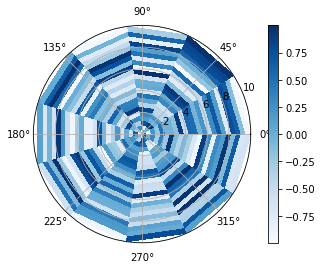

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib inline

fig = plt.figure()
ax = Axes3D(fig)

n = 12
m = 24
rad = np.linspace(0, 10, m)
a = np.linspace(0, 2 * np.pi, n)
r, th = np.meshgrid(rad, a)

z = np.random.uniform(-1, 1, (n,m))
plt.subplot(projection="polar")

plt.pcolormesh(th, r, z, cmap = 'Blues')

plt.plot(a, r, ls='none', color = 'k') 
plt.grid()
plt.colorbar()
plt.show()

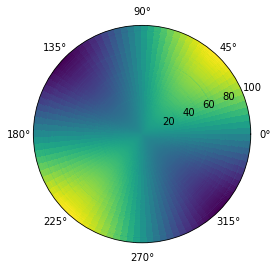

In [7]:
from pylab import *
import numpy as np
from scipy.interpolate import griddata

#create 5000 Random points distributed within the circle radius 100
max_r = 100
max_theta = 2.0 * np.pi
number_points = 5000
points = np.random.rand(number_points,2)*[max_r,max_theta]

#Some function to generate values for these points, 
#this could be values = np.random.rand(number_points)
values = points[:,0] * np.sin(points[:,1])* np.cos(points[:,1])

#now we create a grid of values, interpolated from our random sample above
theta = np.linspace(0.0, max_theta, 100)
r = np.linspace(0, max_r, 200)
grid_r, grid_theta = np.meshgrid(r, theta)
data = griddata(points, values, (grid_r, grid_theta), method='cubic',fill_value=0)

#Create a polar projection
ax1 = plt.subplot(projection="polar")
ax1.pcolormesh(theta,r,data.T)
plt.show()

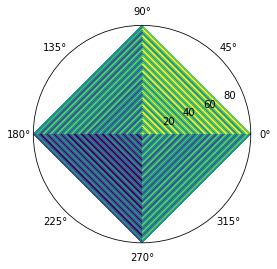

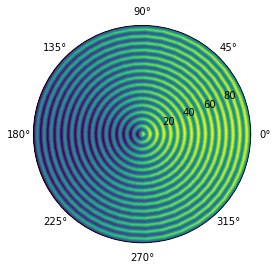

In [8]:
from pylab import *
import numpy as np
from scipy.ndimage import zoom
import pandas as pd

max_r = 100
max_theta = 2.5 * np.pi
number_points = 5

#Generate a grid 100 x 100 r x theta
r = np.arange(0, max_r,max_theta/number_points)
theta = np.arange(0,max_theta,max_theta/number_points)
grid_r, grid_theta = np.meshgrid(r, theta)

#Generate random numbers for each grid point
values = (np.sin(grid_r)+np.cos(grid_theta)).flatten()


#I always find it easier to put it in a dataframe
df = pd.DataFrame(grid_r.flatten()).rename(columns={0:'r'})
df['theta'] = grid_theta.flatten()
df['values'] = values
df = df.pivot(index='theta', columns='r')
#printing the dataframe at this point is very helpful conceptually

#Create a polar projection
ax1 = plt.subplot(projection="polar")
ax1.pcolormesh(df.index,r,df.values.T)
plt.show()

#Zoom in to the grid, this interpolates the results onto a finer grid
#Here I chose a 10x finer grid, this is more efficient than to interpolate onto specified points
zoom_factor=10

zoomed_df = zoom(df, zoom_factor)
zoomed_index = zoom(theta, zoom_factor)
zoomed_columns = zoom(r, zoom_factor)
high_def_grid = pd.DataFrame(zoomed_df, index=zoomed_index, columns=zoomed_columns)


#Create a polar projection
ax1 = plt.subplot(projection="polar")
ax1.pcolormesh(high_def_grid.index,high_def_grid.columns,high_def_grid.values.T)
plt.show()